## Run INSPIRE on whole-embryo slices across multiple developmental stages

In this tutorial, we show INSPIRE's joint analysis of multiple whole-embryo slices across a series of developmental stages, revealing developmental dynamics in organogenesis.

The Stereo-seq mouse embryo data are publicly available at https://db.cngb.org/stomics/mosta/download/.

### Import packages

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import umap
import os
import scipy.sparse
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D

import INSPIRE

import warnings
warnings.filterwarnings("ignore")

### Data preprocessing

Each ST slice contained a large number of spatial spots. For efficiency, we preprocessed each slice respectively.

In [2]:
# slice_name = "E9.5_E1S1"

# # Load data
# print("load data", slice_name)
# data_dir = "data/Stereoseq_mouse_embryo"
# adata = sc.read_h5ad(os.path.join(data_dir, slice_name+".MOSTA.h5ad"))
# adata.X = adata.layers['count']
# adata.var_names_make_unique()
# adata.obs_names_make_unique()

# # Preprocess data
# INSPIRE.utils.calculate_node_features_LGCN(adata=adata,
#                                            slice_name=slice_name,
#                                            preprocessed_data_path="data/Stereoseq_mouse_embryo/preprocessed_data",
#                                            min_genes_qc=50,
#                                            min_cells_qc=50,
#                                            rad_cutoff=1.6
#                                           )

The data after preprocessing are saved into preprocessed_data_path.

### Load preprocessed data

Finding highly variable genes...
Load data E16.5_E1S1
Load data E15.5_E1S2
Load data E14.5_E1S1
Load data E13.5_E1S3
Load data E12.5_E1S1
Load data E11.5_E1S1
Load data E10.5_E2S1
Load data E9.5_E1S1
Find 2366 shared highly variable genes among datasets.
Store counts and library sizes for Poisson modeling...
Normalize data...
Load data E16.5_E1S1
Load data E15.5_E1S2
Load data E14.5_E1S1
Load data E13.5_E1S3
Load data E12.5_E1S1
Load data E11.5_E1S1
Load data E10.5_E2S1
Load data E9.5_E1S1
Load and prepare node features for LGCN...
Load node features E16.5_E1S1
Node features for slice 0 : (121752, 4732)
Load node features E15.5_E1S2
Node features for slice 1 : (109734, 4732)
Load node features E14.5_E1S1
Node features for slice 2 : (102517, 4732)
Load node features E13.5_E1S3
Node features for slice 3 : (84615, 4732)
Load node features E12.5_E1S1
Node features for slice 4 : (51321, 4732)
Load node features E11.5_E1S1
Node features for slice 5 : (30080, 4732)
Load node features E10.5_E2

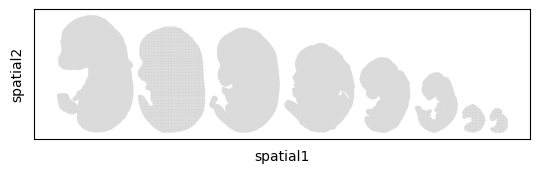

In [3]:
slice_name_list = ["E16.5_E1S1", "E15.5_E1S2", "E14.5_E1S1", "E13.5_E1S3",
                   "E12.5_E1S1", "E11.5_E1S1", "E10.5_E2S1", "E9.5_E1S1"]
preprocessed_data_path = "data/Stereoseq_mouse_embryo/preprocessed_data"

adata_st_list, adata_full = INSPIRE.utils.prepare_inputs_LGCN(slice_name_list=slice_name_list,
                                                               preprocessed_data_path=preprocessed_data_path,
                                                               num_hvgs=10000,
                                                               spot_size=1.,
                                                               min_concat_dist=20)

### Run INSPIRE model

In [4]:
model = INSPIRE.model.Model_LGCN(adata_st_list=adata_st_list,
                                  n_spatial_factors=60,
                                  n_training_steps=10000,
                                  batch_size=2048
                                 )

In [5]:
model.train(adata_st_list)

  0%|          | 1/10000 [00:02<8:08:42,  2.93s/it]

Step: 0, d_loss: 9.7563, Loss: 14470.3174, recon_loss: 13430.5391, fe_loss: 206.3693, geom_loss: 318.0716, beta_loss: 821.9927, gan_loss: 5.0556


  5%|▌         | 501/10000 [04:48<1:28:09,  1.80it/s]

Step: 500, d_loss: 3.9391, Loss: 9748.3359, recon_loss: 8576.5205, fe_loss: 141.3389, geom_loss: 953.5444, beta_loss: 990.5720, gan_loss: 20.8334


 10%|█         | 1001/10000 [09:32<1:24:24,  1.78it/s]

Step: 1000, d_loss: 4.3511, Loss: 5560.2378, recon_loss: 4288.1714, fe_loss: 139.8999, geom_loss: 844.3796, beta_loss: 1094.3047, gan_loss: 20.9743


 15%|█▌        | 1501/10000 [14:17<1:21:28,  1.74it/s]

Step: 1500, d_loss: 4.0369, Loss: 2181.0166, recon_loss: 887.4690, fe_loss: 138.7223, geom_loss: 851.9412, beta_loss: 1117.1818, gan_loss: 20.6048


 20%|██        | 2001/10000 [19:03<1:18:25,  1.70it/s]

Step: 2000, d_loss: 4.1846, Loss: -1081.5323, recon_loss: -2381.0098, fe_loss: 137.5893, geom_loss: 811.6222, beta_loss: 1126.5364, gan_loss: 19.1193


 25%|██▌       | 2501/10000 [23:46<1:12:07,  1.73it/s]

Step: 2500, d_loss: 4.4706, Loss: -3505.8875, recon_loss: -4789.1904, fe_loss: 137.3704, geom_loss: 722.2667, beta_loss: 1112.8763, gan_loss: 18.6107


 30%|███       | 3001/10000 [28:33<1:06:10,  1.76it/s]

Step: 3000, d_loss: 4.3475, Loss: -5384.3340, recon_loss: -6632.8838, fe_loss: 136.8501, geom_loss: 668.6678, beta_loss: 1078.6436, gan_loss: 19.6828


 35%|███▌      | 3501/10000 [33:18<1:00:47,  1.78it/s]

Step: 3500, d_loss: 4.0660, Loss: -7217.1924, recon_loss: -8424.7246, fe_loss: 136.1263, geom_loss: 663.5050, beta_loss: 1039.8154, gan_loss: 18.3203


 40%|████      | 4001/10000 [38:04<59:26,  1.68it/s]  

Step: 4000, d_loss: 4.0875, Loss: -9403.9883, recon_loss: -10558.8711, fe_loss: 135.7218, geom_loss: 662.3605, beta_loss: 987.0184, gan_loss: 18.8953


 45%|████▌     | 4501/10000 [42:51<54:58,  1.67it/s]  

Step: 4500, d_loss: 3.8014, Loss: -9303.3037, recon_loss: -10414.3867, fe_loss: 135.8638, geom_loss: 657.3320, beta_loss: 941.8450, gan_loss: 20.2289


 50%|█████     | 5001/10000 [47:38<46:03,  1.81it/s]

Step: 5000, d_loss: 3.6993, Loss: -10418.0811, recon_loss: -11496.4414, fe_loss: 135.3656, geom_loss: 632.4142, beta_loss: 909.6936, gan_loss: 20.6531


 55%|█████▌    | 5501/10000 [52:23<44:05,  1.70it/s]

Step: 5500, d_loss: 3.6294, Loss: -11148.0176, recon_loss: -12213.6621, fe_loss: 135.1981, geom_loss: 658.2435, beta_loss: 896.4019, gan_loss: 20.8784


 60%|██████    | 6001/10000 [57:10<39:07,  1.70it/s]

Step: 6000, d_loss: 3.3573, Loss: -10800.3359, recon_loss: -11846.3633, fe_loss: 135.2310, geom_loss: 631.8421, beta_loss: 877.1056, gan_loss: 21.0534


 65%|██████▌   | 6501/10000 [1:01:55<32:47,  1.78it/s]

Step: 6500, d_loss: 3.1359, Loss: -10926.4619, recon_loss: -11962.1934, fe_loss: 134.7187, geom_loss: 630.2048, beta_loss: 866.7371, gan_loss: 21.6712


 70%|███████   | 7001/10000 [1:06:39<29:01,  1.72it/s]

Step: 7000, d_loss: 3.2211, Loss: -10624.2373, recon_loss: -11653.9219, fe_loss: 134.8896, geom_loss: 622.0059, beta_loss: 861.1637, gan_loss: 21.1901


 75%|███████▌  | 7501/10000 [1:11:24<23:46,  1.75it/s]

Step: 7500, d_loss: 3.1397, Loss: -11073.6279, recon_loss: -12099.7754, fe_loss: 134.6158, geom_loss: 619.1704, beta_loss: 857.5353, gan_loss: 21.6123


 80%|████████  | 8001/10000 [1:16:08<19:24,  1.72it/s]

Step: 8000, d_loss: 2.8883, Loss: -10210.4922, recon_loss: -11232.1396, fe_loss: 134.6919, geom_loss: 621.0999, beta_loss: 852.0558, gan_loss: 22.4779


 85%|████████▌ | 8501/10000 [1:20:51<14:20,  1.74it/s]

Step: 8500, d_loss: 2.8580, Loss: -11180.9639, recon_loss: -12198.9785, fe_loss: 134.3298, geom_loss: 605.2108, beta_loss: 848.9562, gan_loss: 22.6241


 90%|█████████ | 9001/10000 [1:25:37<09:38,  1.73it/s]

Step: 9000, d_loss: 2.7429, Loss: -11645.4258, recon_loss: -12660.1729, fe_loss: 134.2891, geom_loss: 589.8057, beta_loss: 845.8677, gan_loss: 22.7938


 95%|█████████▌| 9501/10000 [1:30:22<04:34,  1.81it/s]

Step: 9500, d_loss: 2.7325, Loss: -11080.0430, recon_loss: -12094.7314, fe_loss: 134.2314, geom_loss: 563.2120, beta_loss: 846.3796, gan_loss: 22.8124


100%|██████████| 10000/10000 [1:35:08<00:00,  1.75it/s]


### Access spot representations, proportions of spatial factors in spots, and gene loading matrix

We evaluate the spot representations and proportions of spatial factors in spots with minibatches.

In [6]:
adata_full, basis_df = model.eval_minibatch(adata_st_list, 
                                            adata_full, 
                                            batch_size=10000
                                           )

Evaluate Z and beta using minibatch...
Evaluation for slice 0
Evaluation for slice 1
Evaluation for slice 2
Evaluation for slice 3
Evaluation for slice 4
Evaluation for slice 5
Evaluation for slice 6
Evaluation for slice 7


We calculate 2D UMAP coordinates of spatial spots across slices based on INSPIRE's inferred spot representations.

In [7]:
reducer = umap.UMAP(n_neighbors=30,
                    n_components=2,
                    metric="correlation",
                    n_epochs=None,
                    learning_rate=1.0,
                    min_dist=0.3,
                    spread=1.0,
                    set_op_mix_ratio=1.0,
                    local_connectivity=1,
                    repulsion_strength=1,
                    negative_sample_rate=5,
                    a=None,
                    b=None,
                    random_state=1234,
                    metric_kwds=None,
                    angular_rp_forest=False,
                    verbose=True)
embedding = reducer.fit_transform(adata_full.obsm['latent'])
adata_full.obsm["X_umap"] = embedding
adata_full.obs["slice_label"] = adata_full.obs["slice_label"].values.astype(str)

# sc.pl.umap(adata_full, color=["slice_label"])

UMAP(angular_rp_forest=True, local_connectivity=1, metric='correlation', min_dist=0.3, n_neighbors=30, random_state=1234, repulsion_strength=1, verbose=True)
Fri Aug 23 15:18:03 2024 Construct fuzzy simplicial set
Fri Aug 23 15:18:03 2024 Finding Nearest Neighbors
Fri Aug 23 15:18:03 2024 Building RP forest with 41 trees
Fri Aug 23 15:18:09 2024 NN descent for 19 iterations
	 1  /  19
	 2  /  19
	Stopping threshold met -- exiting after 2 iterations
Fri Aug 23 15:18:47 2024 Finished Nearest Neighbor Search
Fri Aug 23 15:18:55 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Aug 23 15:30:41 2024 Finished embedding


We perform clustering on INSPIRE's learned spot representations to identify spatial domains across slices.

In [8]:
# clustering
sc.pp.neighbors(adata_full, use_rep="latent")
sc.tl.louvain(adata_full, resolution=.4)

Visualization of spot representations and spatial domain identification result

In [9]:
adata = adata_full
annotations = ["Cartilage and connective tissue", "Brain region I", "Cavisity",
               "Other", "Meninges", "Jaw and tooth", "Liver", "Epidermis",
               "Muscle", "Brain region II", "Heart", "Lung", "Dorsal root ganglion",
               "Brain region III", "Olfactory epithelium and inner ear", "Sympathetic nerve"]

adata.obs["annotation"] = ""
for i in range(len(annotations)):
    adata.obs["annotation"][adata.obs["louvain"].values.astype(str) == str(i)] = annotations[i]

anno_list = list(sorted(["Cartilage and connective tissue", "Brain region I", "Cavisity",
                         "Meninges", "Jaw and tooth", "Liver", "Epidermis",
                         "Muscle", "Brain region II", "Heart", "Lung", "Dorsal root ganglion",
                         "Brain region III", "Olfactory epithelium and inner ear", "Sympathetic nerve"])) + ["Other"]
adata.obs["anno_num"] = 0
for i, anno in enumerate(anno_list):
    adata.obs["anno_num"][adata.obs["annotation"].values.astype(str) == anno] = i

rgb_10 = [i for i in get_cmap('Set3').colors]
rgb_20 = [i for i in get_cmap('tab20').colors]
rgb_20b = [i for i in get_cmap('tab20b').colors]
rgb_dark2 = [i for i in get_cmap('Dark2').colors]
rgb_pst1 = [i for i in get_cmap('Pastel1').colors]
rgb_acc = [i for i in get_cmap('Accent').colors]
rgb2hex_10 = [mpl.colors.rgb2hex(color) for color in rgb_10]
rgb2hex_20 = [mpl.colors.rgb2hex(color) for color in rgb_20]
rgb2hex_20b = [mpl.colors.rgb2hex(color) for color in rgb_20b]
rgb2hex_20b_new = [rgb2hex_20b[i] for i in [0, 3, 4, 7, 8, 11, 12, 15, 16, 19]]
rgb2hex_dark2 = [mpl.colors.rgb2hex(color) for color in rgb_dark2]
rgb2hex_pst1 = [mpl.colors.rgb2hex(color) for color in rgb_pst1]
rgb2hex_acc = [mpl.colors.rgb2hex(color) for color in rgb_acc]
rgb2hex = rgb2hex_20 + rgb2hex_20b_new + rgb2hex_dark2 + rgb2hex_pst1 + rgb2hex_acc

adata.obs["c_hex"] = ""
for i in range(len(annotations)):
    adata.obs["c_hex"][adata.obs["louvain"].values.astype(str) == str(i)] = rgb2hex[i]

In [10]:
color_list = ["#1F78B4", "#A6CEE3", "#33A02C", "#B2DF8A", "#FF7F00", "#FDBF6F", "#6A3D9A", "#CAB2D6"]
adata.obs["slice_hex"] = ""
for i in range(len(color_list)):
    adata.obs["slice_hex"][adata.obs["slice_label"].values.astype(str) == str(i)] = color_list[i]

In [11]:
slice_name_list = ["E16.5_E1S1", "E15.5_E1S2", "E14.5_E1S1", "E13.5_E1S3",
                   "E12.5_E1S1", "E11.5_E1S1", "E10.5_E2S1", "E9.5_E1S1"]
slice_name_list = [slice_name_list[i].split("_")[0] for i in range(len(slice_name_list))]

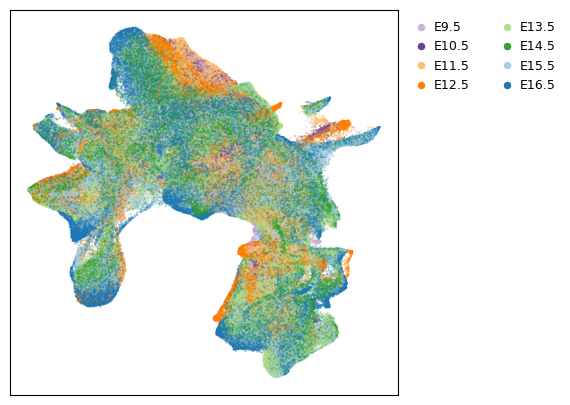

In [12]:
n_cells = adata.shape[0]
size = 0.03
np.random.seed(1234)
order = np.arange(n_cells)
np.random.shuffle(order)

umap = adata.obsm["X_umap"]

f = plt.figure(figsize=(5,5))
ax0 = f.add_subplot(1,1,1)
scatter0 = ax0.scatter(umap[order, 0], umap[order, 1], s=size, c=adata.obs["slice_hex"][order], rasterized=True)
legend_elements_slice = [Line2D([0], [0], marker='o', color="w", label=slice_name_list[7-i], markerfacecolor=color_list[7-i], markersize=8) for i in range(len(slice_name_list))]
ax0.legend(handles=legend_elements_slice, loc="upper left", bbox_to_anchor=(1, 1.), frameon=False, 
           markerscale=.8, fontsize=9, handletextpad=0., ncol=2)
ax0.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
plt.show()

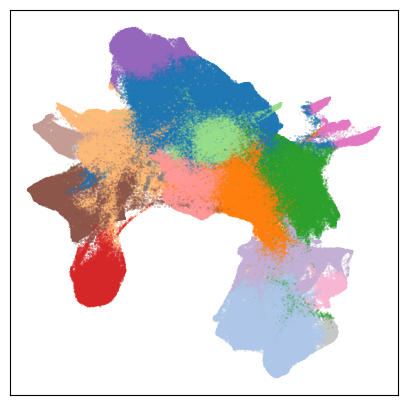

In [13]:
f = plt.figure(figsize=(5,5))
ax1 = f.add_subplot(1,1,1)
scatter1 = ax1.scatter(umap[order, 0], umap[order, 1], s=size, c=adata.obs["c_hex"][order], rasterized=True)
ax1.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
plt.show()

In [14]:
n_slices = len(slice_name_list)
loc_list = []
for i in range(n_slices):
    loc_list.append(adata_st_list[i].obsm["spatial"])

min_concat_dist = 20.

loc_list_new = [loc_list[0].copy()]
for i in range(n_slices):
    # Re-calculate spatial locations
    if i > 0:
        xmin_1 = np.min(loc_list[i-1][:,0])
        xmin_2 = np.min(loc_list[i][:,0])
        xmax_2 = np.max(loc_list[i][:,0])
        ymax_1 = np.max(loc_list[i-1][:,1])
        ymax_2 = np.max(loc_list[i][:,1])
        loc_list[i][:,0] = loc_list[i][:,0] - xmin_2 + xmin_1 - (xmax_2 - xmin_2 + min_concat_dist)
        loc_list[i][:,1] = loc_list[i][:,1] + (ymax_1 - ymax_2)
loc_full = np.concatenate([loc_list[i] for i in range(n_slices)], axis=0)
adata.obsm["spatial"] = loc_full

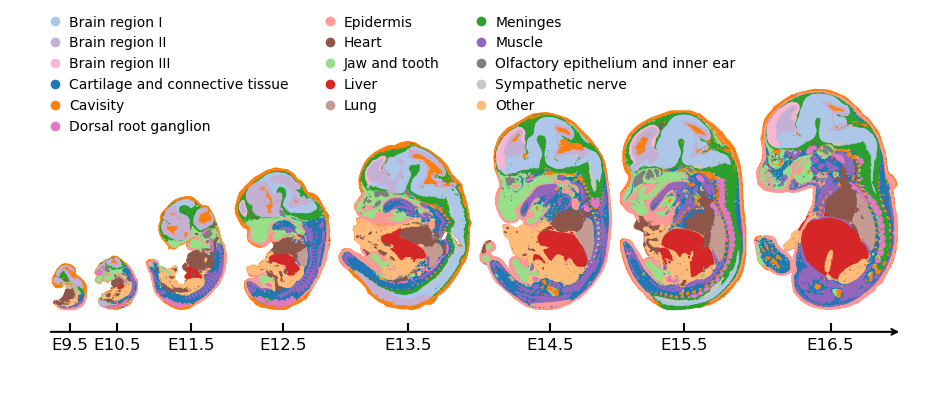

In [15]:
size = 0.5

# louvain
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(1,1,1)
ax.axis('equal')
colors = rgb2hex
for i in range(len(annotations)):
    ax.scatter(adata.obsm["spatial"][adata.obs["louvain"].values.astype(str)==str(i), 0], 
               -adata.obsm["spatial"][adata.obs["louvain"].values.astype(str)==str(i), 1], 
               s=size, facecolors=colors[i], edgecolors='none', label="cluster "+str(i), rasterized=True)

y_arrow = 168
ax.annotate("", xy=(max(loc_list[0][:,0])+10, y_arrow), xytext=(min(loc_list[-1][:,0])-10, y_arrow), arrowprops=dict(arrowstyle="->", lw=1.5))
for i in range(len(loc_list)):
    x_m = np.median(loc_list[i][:, 0])
    plt.vlines(x = x_m, ymin=y_arrow, ymax=y_arrow+20, color = 'k')
    e_val = slice_name_list[i].split("_")[0]
    plt.annotate(e_val, xy=(x_m, y_arrow-40), ha='center', fontsize=12)

legend_elements_slice = [Line2D([0], [0], marker='o', color="w", label=anno_list[i], markerfacecolor=adata[adata.obs["annotation"]==anno_list[i], :].obs["c_hex"][0], markersize=8) for i in range(len(anno_list))]
ax.legend(handles=legend_elements_slice, loc="upper left", bbox_to_anchor=(0.02, 1.04), frameon=False, 
          markerscale=1, fontsize=10, handletextpad=0., ncol=3)
ax.set_axis_off()

### Save results

In [16]:
### Save results
res_path = "Results/INSPIRE_developmental_stages"
adata_full.write(res_path + "/adata_inspire.h5ad")
basis_df.to_csv(res_path + "/basis_df_inspire.csv")